In [32]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_curve, auc
%matplotlib inline

In [2]:
raw_df=pd.read_csv('adult.data')

In [3]:
raw_df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
raw_df.columns=['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','sal']

In [5]:
raw_df.occupation.unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [6]:
raw_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,sal
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [7]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
age               32560 non-null int64
workclass         32560 non-null object
fnlwgt            32560 non-null int64
education         32560 non-null object
education_num     32560 non-null int64
marital_status    32560 non-null object
occupation        32560 non-null object
relationship      32560 non-null object
race              32560 non-null object
sex               32560 non-null object
capital_gain      32560 non-null int64
capital_loss      32560 non-null int64
hours_per_week    32560 non-null int64
native_country    32560 non-null object
sal               32560 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
for col in raw_df.columns:
    print (col, "\n", raw_df[col].value_counts(normalize=True).head(), "\n\n")
# unusual data in native_country , 1%

age 
 36    0.027580
31    0.027273
34    0.027211
23    0.026935
35    0.026904
Name: age, dtype: float64 


workclass 
  Private             0.697052
 Self-emp-not-inc    0.078041
 Local-gov           0.064281
 ?                   0.056388
 State-gov           0.039834
Name: workclass, dtype: float64 


fnlwgt 
 123011    0.000399
203488    0.000399
164190    0.000399
121124    0.000369
148995    0.000369
Name: fnlwgt, dtype: float64 


education 
  HS-grad         0.322512
 Some-college    0.223925
 Bachelors       0.164435
 Masters         0.052918
 Assoc-voc       0.042445
Name: education, dtype: float64 


education_num 
 9     0.322512
10    0.223925
13    0.164435
14    0.052918
11    0.042445
Name: education_num, dtype: float64 


marital_status 
  Married-civ-spouse    0.459951
 Never-married         0.328071
 Divorced              0.136456
 Separated             0.031480
 Widowed               0.030498
Name: marital_status, dtype: float64 


occupation 
  Prof-specialty     

In [9]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
raw_df['sal_greater50'] = lb_make.fit_transform(raw_df['sal'])
raw_df.drop(['sal'],axis=1)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,sal_greater50
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


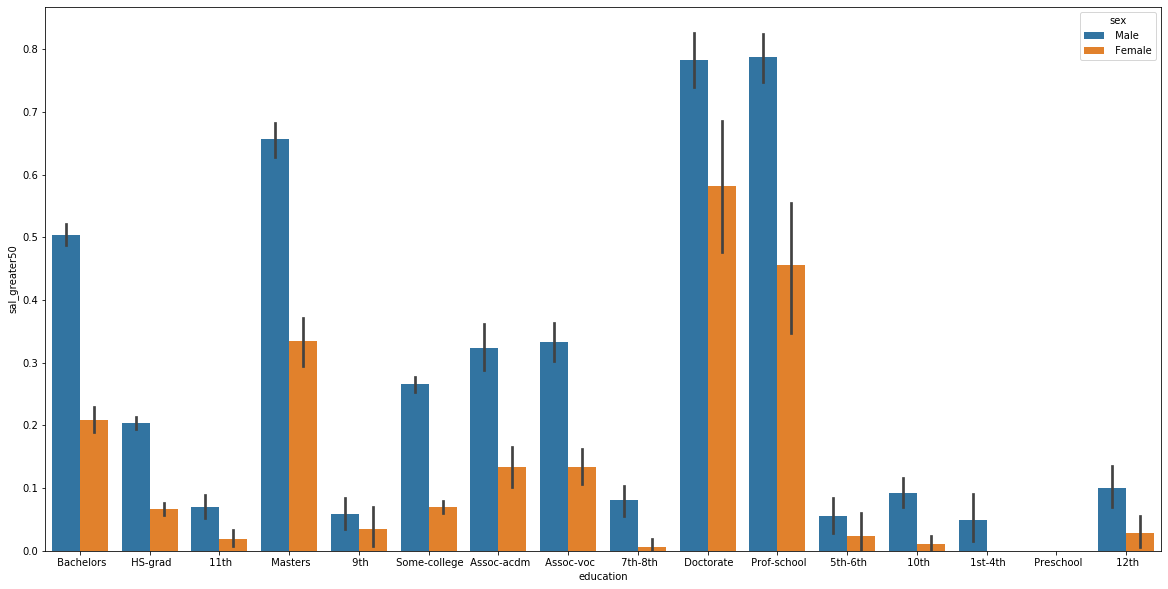

In [10]:
plt.figure(figsize=(20,10))
sns.barplot(x='education',y='sal_greater50',data=raw_df,hue='sex')



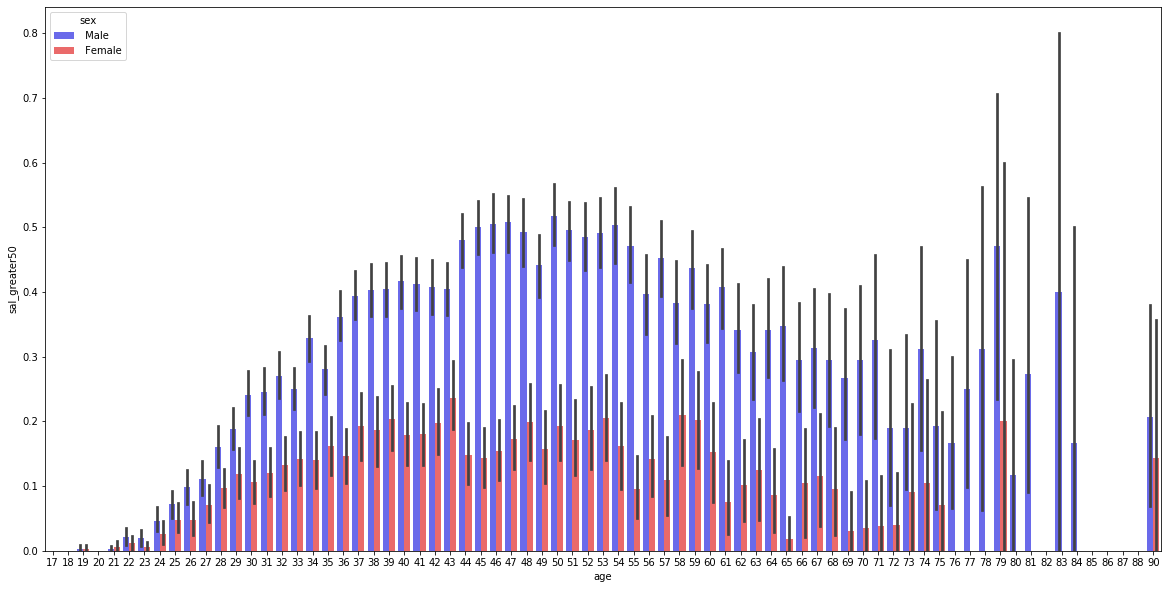

In [11]:
plt.figure(figsize=(20,10))
sns.barplot(x='age',y='sal_greater50',data=raw_df,hue='sex',palette='seismic')

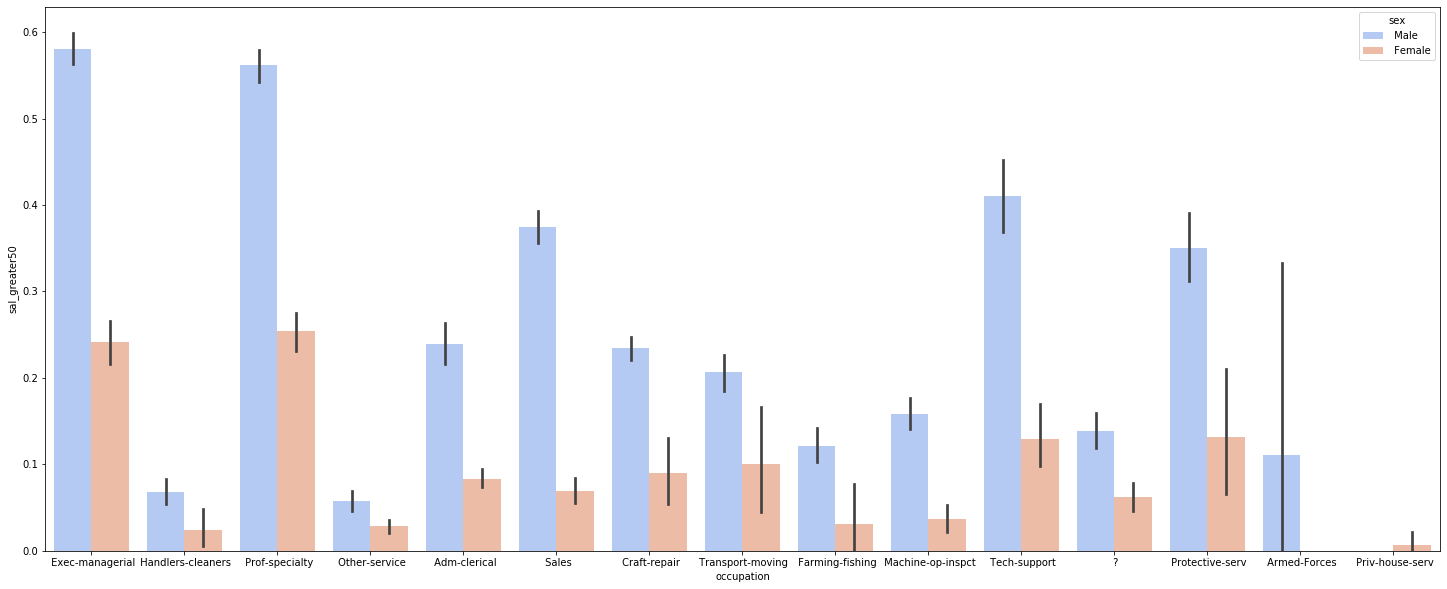

In [12]:
plt.figure(figsize=(25,10))
sns.barplot(x='occupation',y='sal_greater50',data=raw_df,hue='sex',palette='coolwarm')

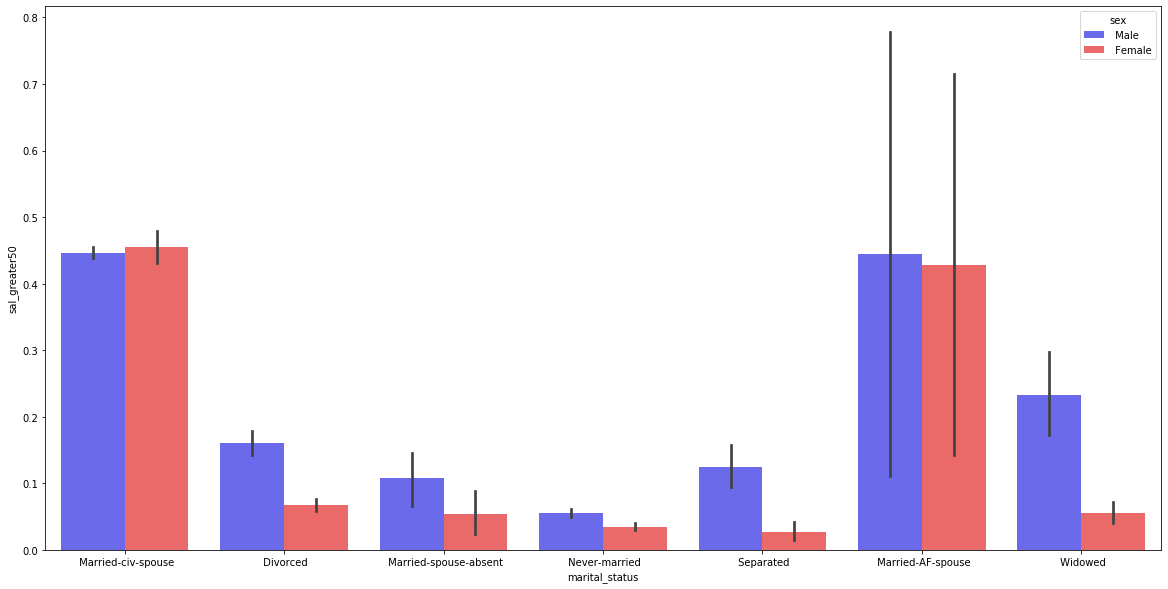

In [13]:
plt.figure(figsize=(20,10))
sns.barplot(x='marital_status',y='sal_greater50',data=raw_df,hue='sex',palette="seismic")

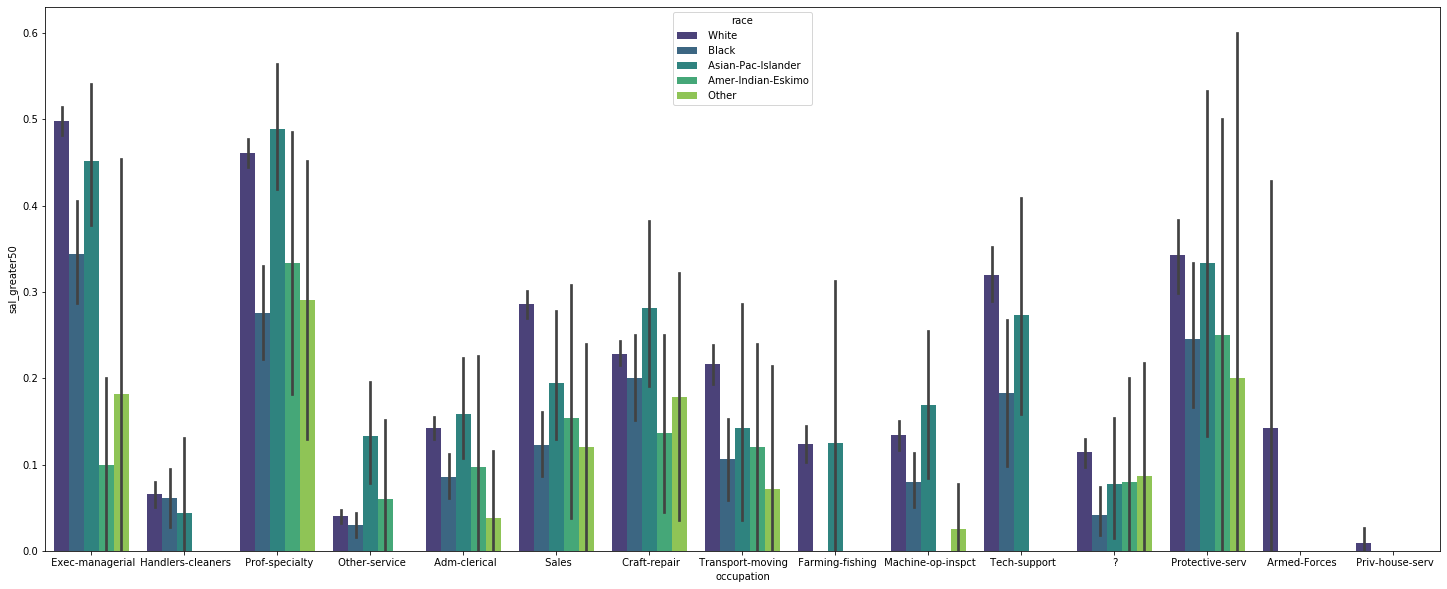

In [14]:
plt.figure(figsize=(25,10))
sns.barplot(x='occupation',y='sal_greater50',data=raw_df,hue='race',palette='viridis')


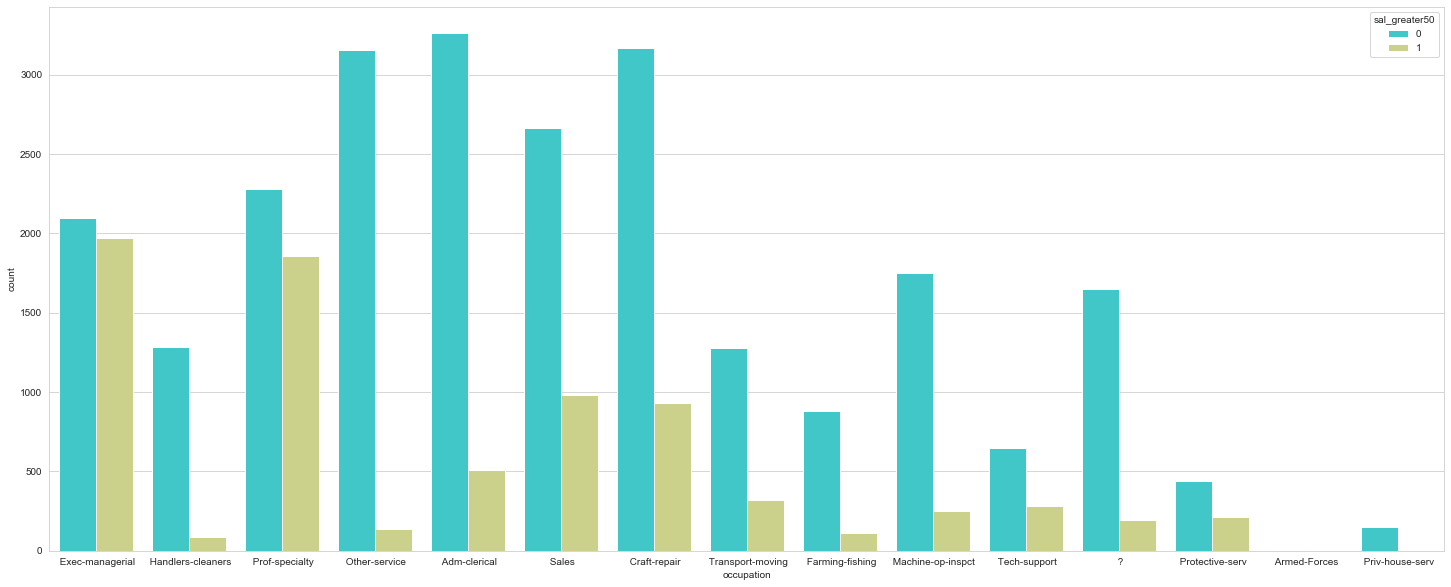

In [15]:
sns.set_style('whitegrid')
plt.figure(figsize=(25,10))
sns.countplot(x='occupation',hue='sal_greater50',data=raw_df,palette='rainbow')

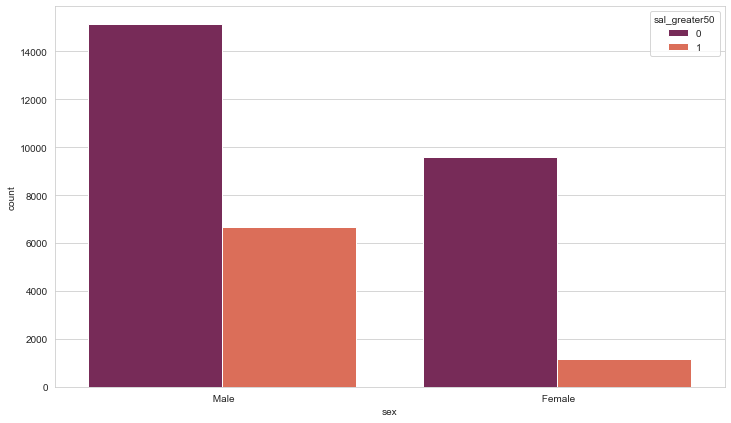

In [16]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,7))
sns.countplot(x='sex',hue='sal_greater50',data=raw_df,palette='rocket')

Text(0.5, 0, 'age')

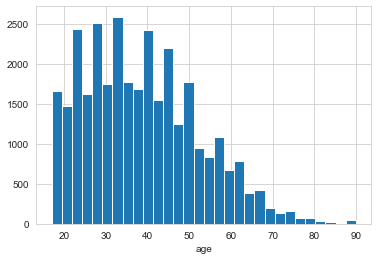

In [17]:
sns.set_style('whitegrid')
raw_df['age'].hist(bins=30)
plt.xlabel('age')


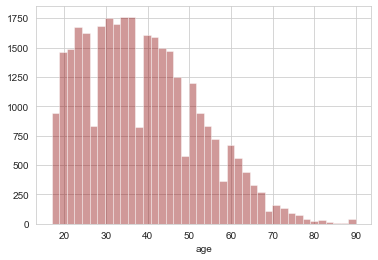

In [18]:
sns.distplot(raw_df['age'].dropna(),kde=False,color='darkred',bins=40)

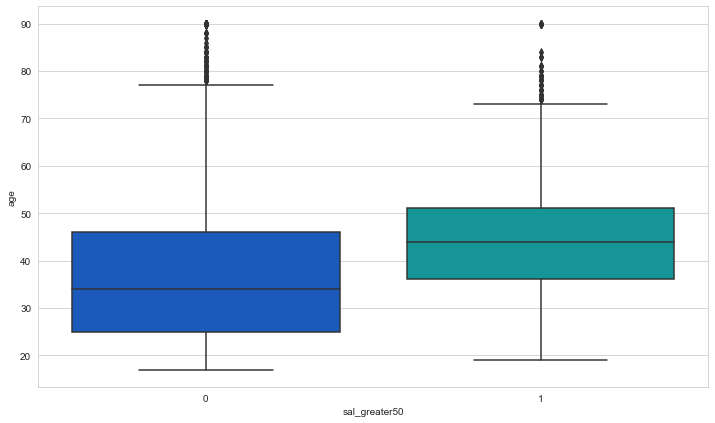

In [19]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='sal_greater50',y='age',data=raw_df,palette='winter')

In [20]:
df=raw_df.copy()
df.drop(['education_num','fnlwgt','sal'],axis=1,inplace=True)

In [21]:
# workclass=pd.get_dummies(df['workclass'],drop_first=True)
# education=pd.get_dummies(df['education'],drop_first=True)
# marital_status=pd.get_dummies(df['marital_status'],drop_first=True)

# occupation=pd.get_dummies(df['occupation'],drop_first=True)
# relationship=pd.get_dummies(df['relationship'],drop_first=True)
# race=pd.get_dummies(df['race'],drop_first=True)
# sex=pd.get_dummies(df['sex'],drop_first=True)
# native_country=pd.get_dummies(df['native_country'],drop_first=True)

df['workclass'] = lb_make.fit_transform(df['workclass'])
df['education'] = lb_make.fit_transform(df['education'])
df['marital_status'] = lb_make.fit_transform(df['marital_status'])
df['occupation'] = lb_make.fit_transform(df['occupation'])
df['relationship'] = lb_make.fit_transform(df['relationship'])
df['race'] = lb_make.fit_transform(df['race'])
df['sex'] = lb_make.fit_transform(df['sex'])
df['native_country'] = lb_make.fit_transform(df['native_country'])
                                     





In [22]:
df.head()

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,sal_greater50
0,50,6,9,2,4,0,4,1,0,0,13,39,0
1,38,4,11,0,6,1,4,1,0,0,40,39,0
2,53,4,1,2,6,0,2,1,0,0,40,39,0
3,28,4,9,2,10,5,2,0,0,0,40,5,0
4,37,4,12,2,4,5,4,0,0,0,40,39,0


In [23]:
y=df['sal_greater50']
X=df.drop(['sal_greater50'],axis=1)


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#### Building Logistic Regression using scikit-learn

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Prediction with Logistic Regression Model

In [31]:
y_hat_train = logmodel.predict(X_train)

In [28]:
from sklearn.metrics import confusion_matrix, classification_report

In [29]:
# print(confusion_matrix(y_train,y_hat_train))
# print(classification_report(y_train,y_hat_train))

In [33]:
# Calculate accuracy 
acc = accuracy_score(y_train,y_hat_train)
print('Accuracy is :{0}'.format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train,y_hat_train)
roc_auc = auc(false_positive_rate,true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

Accuracy is :0.8003685503685504

AUC is :0.63


#### Building Trees using scikit-learn 

In [34]:
#import files
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.tree import export_graphviz
from IPython.display import Image  
from pydotplus import graph_from_dot_data
from sklearn.model_selection import cross_val_score

#### Train the classifier and make predictions

In [35]:
# Train a DT classifier
dtree=DecisionTreeClassifier(random_state=10)
cross_val_score(dtree, X_train, y_train, cv=10)
## Your code here
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [38]:
cross_val_score(dtree, X_train, y_train, cv=5)

array([0.81526413, 0.80850737, 0.8125    , 0.81818182, 0.81879607])

#### Predictions and Evaluation of Decision Tree


In [ ]:
#make prediction with train data
predict_dtree = dtree.predict(X_train)

In [ ]:

# Calculate accuracy 
acc = accuracy_score(y_train,predict_dtree)
print('Accuracy is :{0}'.format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train,predict_dtree)
roc_auc = auc(false_positive_rate,true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print(confusion_matrix(y_train,predict_dtree))

#### Grid search: Decision trees

In [ ]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [ ]:
# Instantiate GridSearchCV
from sklearn.model_selection import GridSearchCV, cross_val_score
dt_grid_search = GridSearchCV(DecisionTreeClassifier(),param_grid= dt_param_grid,cv=3,return_train_score=True)


# Fit to the data
dt_grid_search.fit(X_train,y_train)

#### Training the Random Forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=600)

In [ ]:
rfc.fit(X_train,y_train)

#### Predictions and Evaluation with Random Forest Model


In [ ]:
predictions = rfc.predict(X_train)

In [ ]:
print(classification_report(y_train,predictions))

In [ ]:
print(confusion_matrix(y_train,predictions))

#### Train a Model with SVM

In [ ]:

#Now its time to train a Support Vector Machine Classifier.
#Call the SVC() model from sklearn and fit the model to the training data.


from sklearn.svm import SVC


svc_model = SVC()


svc_model.fit(X_train,y_train)

#### Model Evaluation With SVM


In [ ]:
predictions = svc_model.predict(X_train)

In [ ]:
print(confusion_matrix(y_train,predictions))

In [ ]:
print(classification_report(y_train,predictions))

#### Gridsearch 

In [ ]:

##Import GridsearchCV from SciKit Learn


from sklearn.model_selection import GridSearchCV


In [ ]:
##Create a dictionary called param_grid and fill out some parameters for C and gamma.


param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

In [ ]:
# grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
# grid.fit(X_train,y_train)

In [ ]:
# grid_predictions = grid.predict(X_train)

In [ ]:
# print(confusion_matrix(y_train,predictions))

In [ ]:
# print(classification_report(y_train,predictions))